In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

## Dataset Description

This dataset contains match-level information of IPL 2022, including details about teams, venue, toss decisions, innings scores, match results, and key player performances such as Player of the Match, top scorer, and best bowler.
It is useful for analyzing team performance, toss impact, scoring patterns, and player contributions in IPL matches.

OExplanation of Important Columns (Top 10)

1) **match_id :**
Unique identifier assigned to each IPL match.

2) **venue :**
The stadium where the match was played.

3) **team1 :**
Team that batted or played first in the match.

4) **team2 :**
Team that batted or played second in the match.

5) **toss_winner :**
Team that won the toss before the match started.

6) **toss_decision :**
Decision taken by the toss winner to bat or field first.

7) **first_ings_score :**
Total runs scored by the team batting in the first innings.

8) **second_ings_score :**
Total runs scored by the team batting in the second innings.

9) **match_winner :**
Team that won the match.

10) **player_of_the_match :**
Player who delivered the most impactful performance in the match.

In [3]:
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [4]:
# View first 5 rows
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [5]:
# Shape of data
print("Shape:", df.shape)

Shape: (74, 20)


In [6]:
# Column names
print("Columns:\n", df.columns)

Columns:
 Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')


In [7]:
df.isnull().sum()


,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


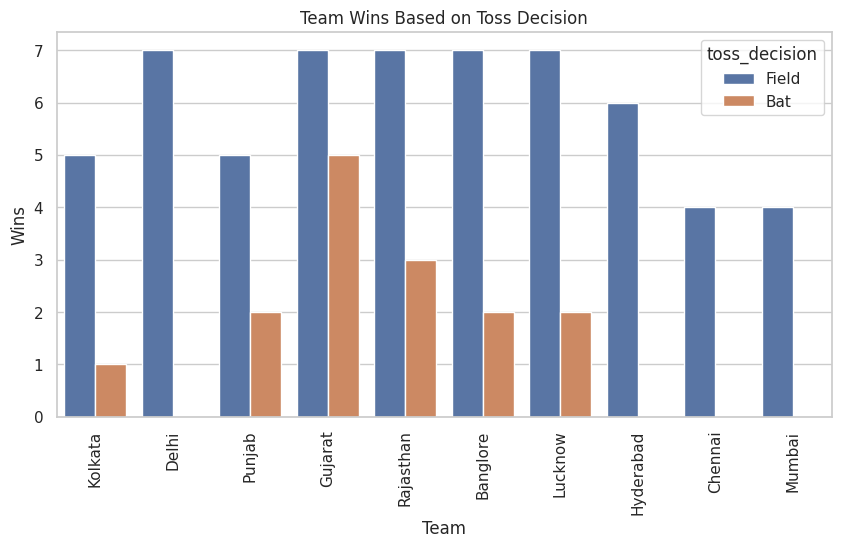

In [8]:
sns.countplot(
    data=df,
    x='match_winner',
    hue='toss_decision'
)
plt.xticks(rotation=90)
plt.title("Team Wins Based on Toss Decision")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()


**Insight:** Teams that choose to field after winning the toss win significantly more matches than teams choosing to bat.

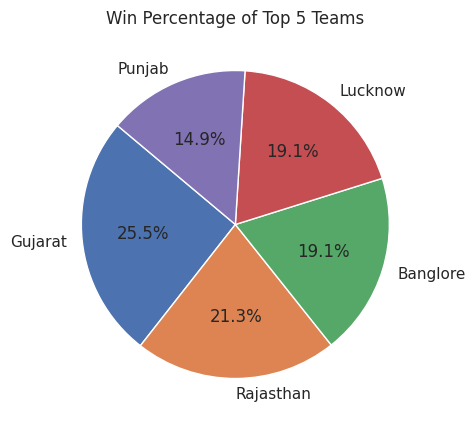

In [9]:
top_wins = df['match_winner'].value_counts().head(5)

plt.pie(
    top_wins.values,
    labels=top_wins.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Win Percentage of Top 5 Teams")
plt.show()


**Insight:** Gujarat dominates the tournament with the highest win percentage, followed by Rajasthan, while Punjab contributes the smallest share among the top teams.

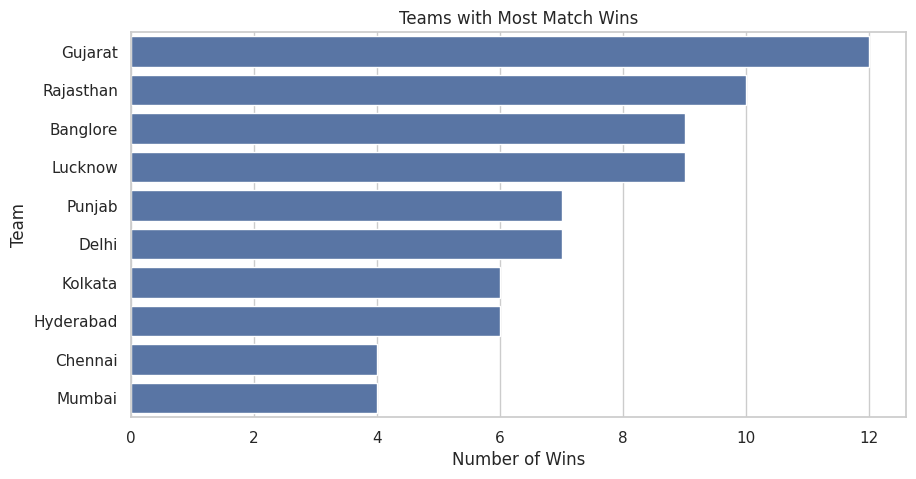

In [11]:

# Count wins per team
wins = df['match_winner'].value_counts()

sns.barplot(
    x=wins.values,
    y=wins.index
)
plt.title("Teams with Most Match Wins")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.show()


**Insight:** Gujarat is the most successful team overall, whereas Mumbai and Chennai have comparatively fewer wins.

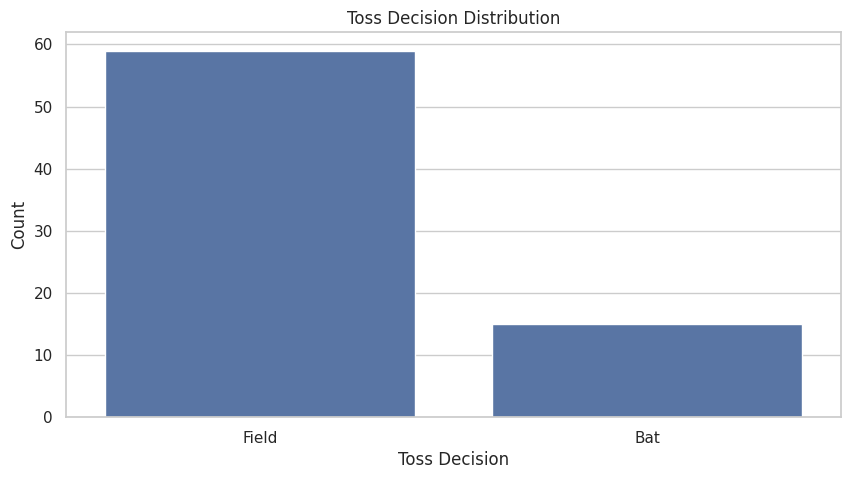

In [13]:
sns.countplot(data=df, x="toss_decision")
plt.title("Toss Decision Distribution")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.show()



**Insight:** The majority of teams prefer fielding after winning the toss, indicating a strong chasing advantage.

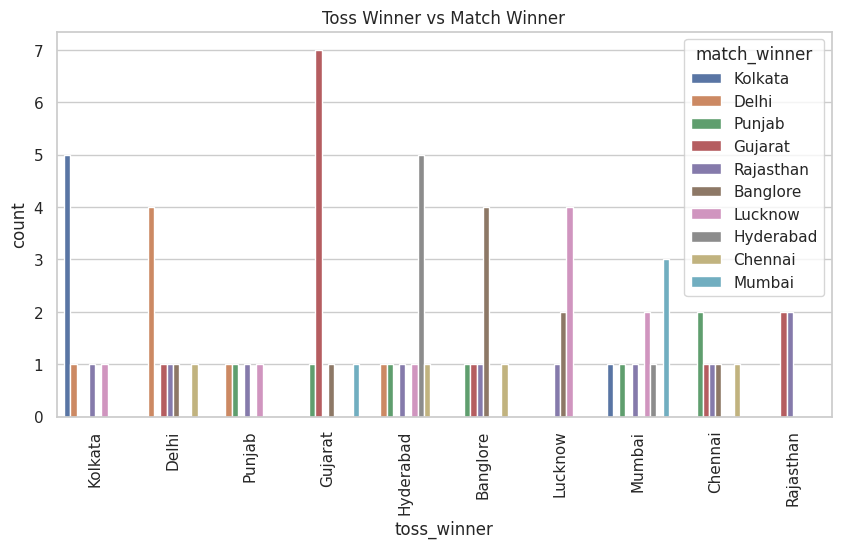

In [14]:
sns.countplot(data=df, x="toss_winner", hue="match_winner")
plt.xticks(rotation=90)
plt.title("Toss Winner vs Match Winner")
plt.show()



**Insight:** Winning the toss does not always guarantee match victory, but certain teams convert toss wins into match wins more effectively.

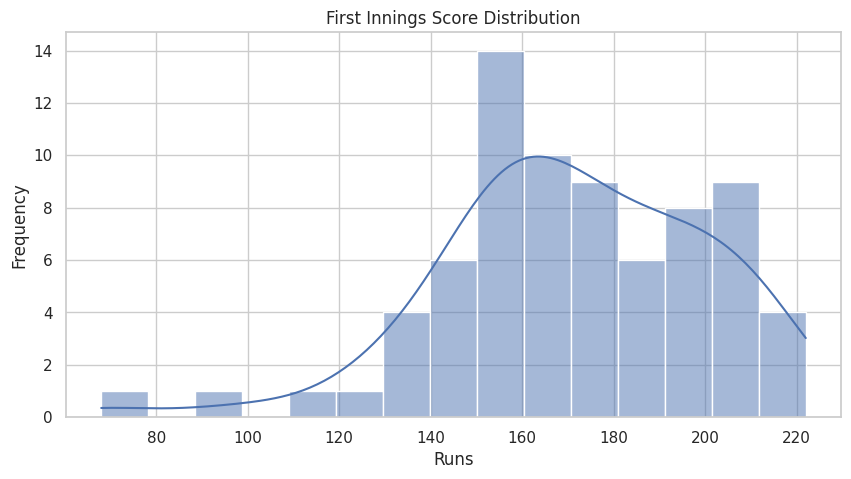

In [16]:
sns.histplot(df["first_ings_score"], bins=15, kde=True)
plt.title("First Innings Score Distribution")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()


**Insight:** Most first-innings scores fall between 140–180 runs, indicating a competitive par score range.

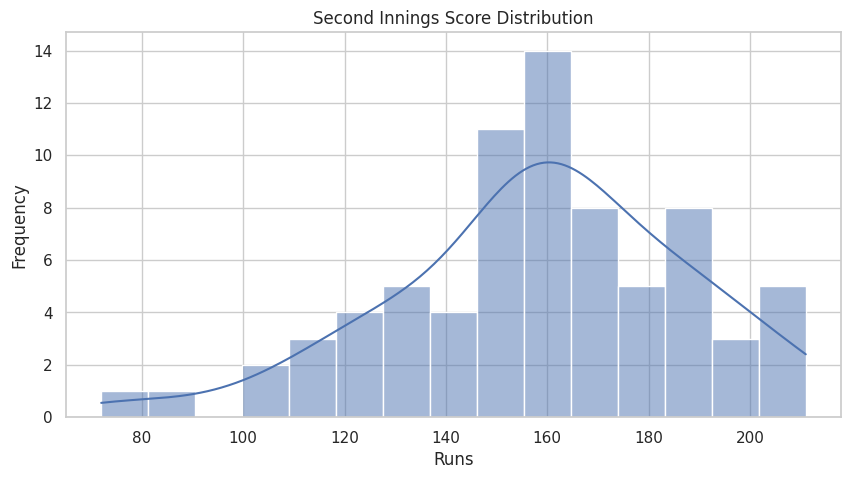

In [17]:
sns.histplot(df["second_ings_score"], bins=15, kde=True)
plt.title("Second Innings Score Distribution")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()


**Insight:** Second-innings scores are slightly lower and more spread out, reflecting pressure and chasing challenges.

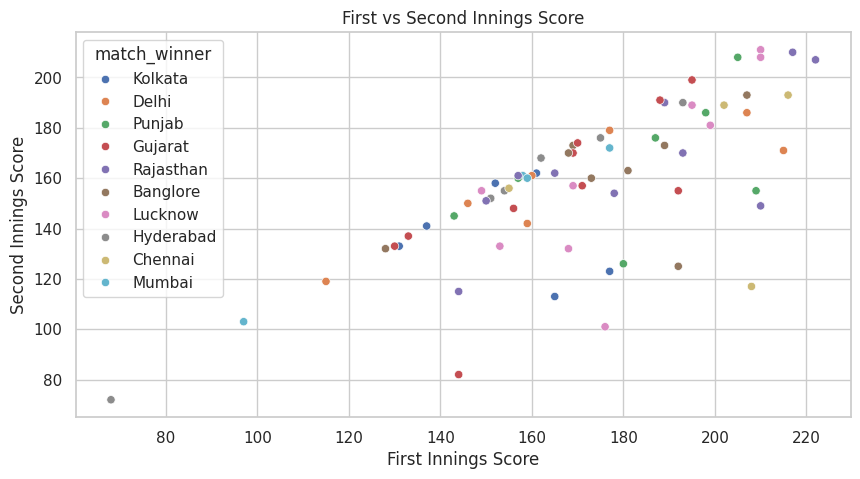

In [18]:
sns.scatterplot(
    data=df,
    x="first_ings_score",
    y="second_ings_score",
    hue="match_winner"
)
plt.title("First vs Second Innings Score")
plt.xlabel("First Innings Score")
plt.ylabel("Second Innings Score")
plt.show()


**Insight:** A strong positive relationship shows that higher first-innings scores generally force higher second-innings chases.

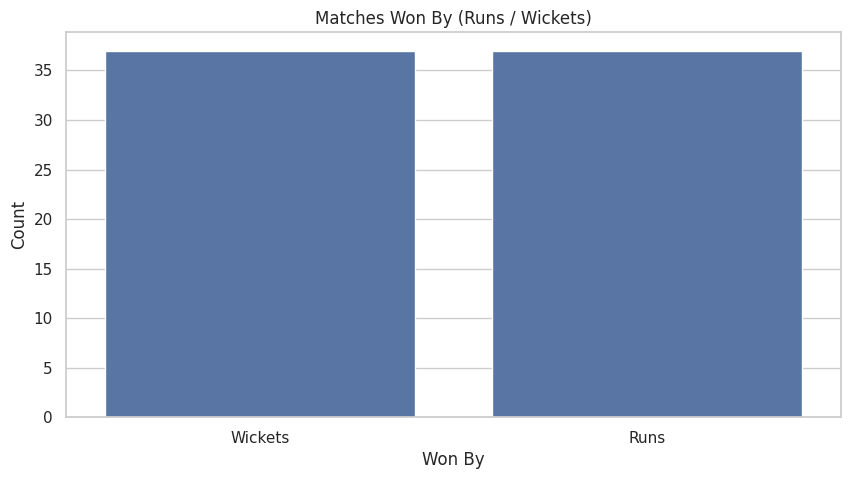

In [19]:
sns.countplot(data=df, x="won_by")
plt.title("Matches Won By (Runs / Wickets)")
plt.xlabel("Won By")
plt.ylabel("Count")
plt.show()


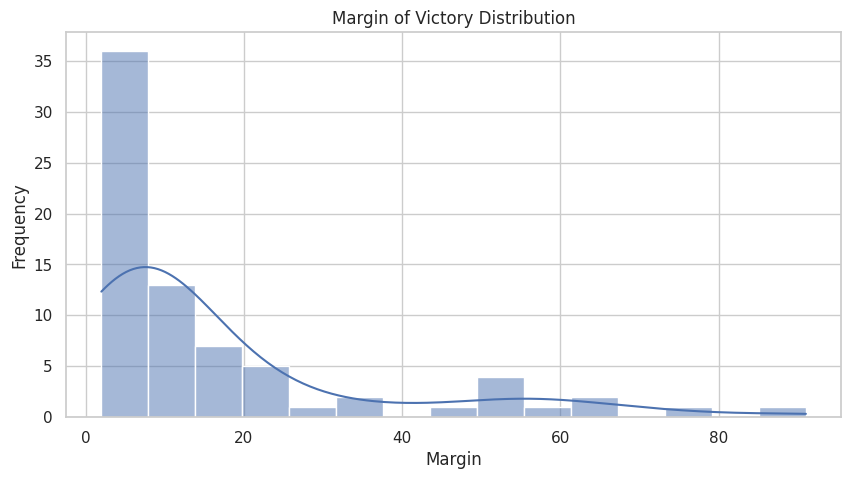

In [20]:
sns.histplot(df["margin"], bins=15, kde=True)
plt.title("Margin of Victory Distribution")
plt.xlabel("Margin")
plt.ylabel("Frequency")
plt.show()


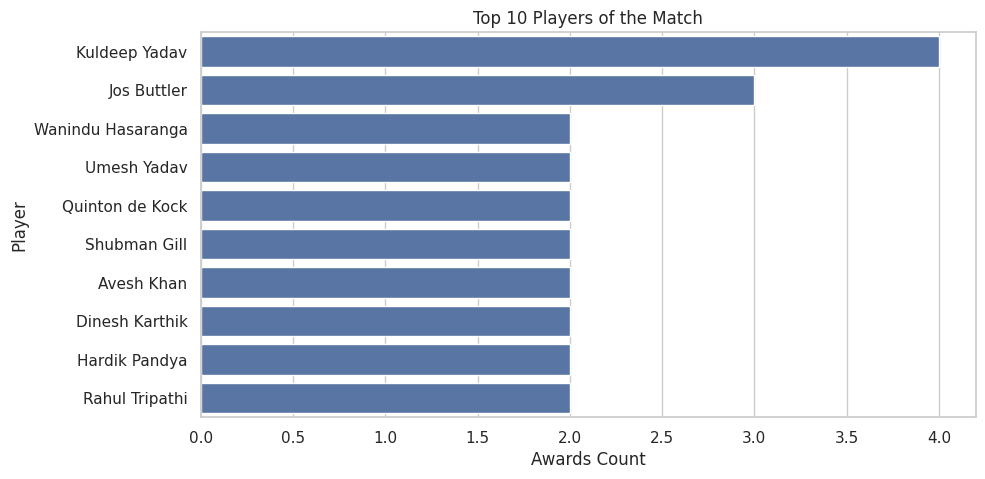

In [21]:
top_pom = df["player_of_the_match"].value_counts().head(10)

sns.barplot(
    x=top_pom.values,
    y=top_pom.index
)
plt.title("Top 10 Players of the Match")
plt.xlabel("Awards Count")
plt.ylabel("Player")
plt.show()


**Insight:** Kuldeep Yadav and Jos Buttler have the highest Player of the Match awards, highlighting consistent individual impact.

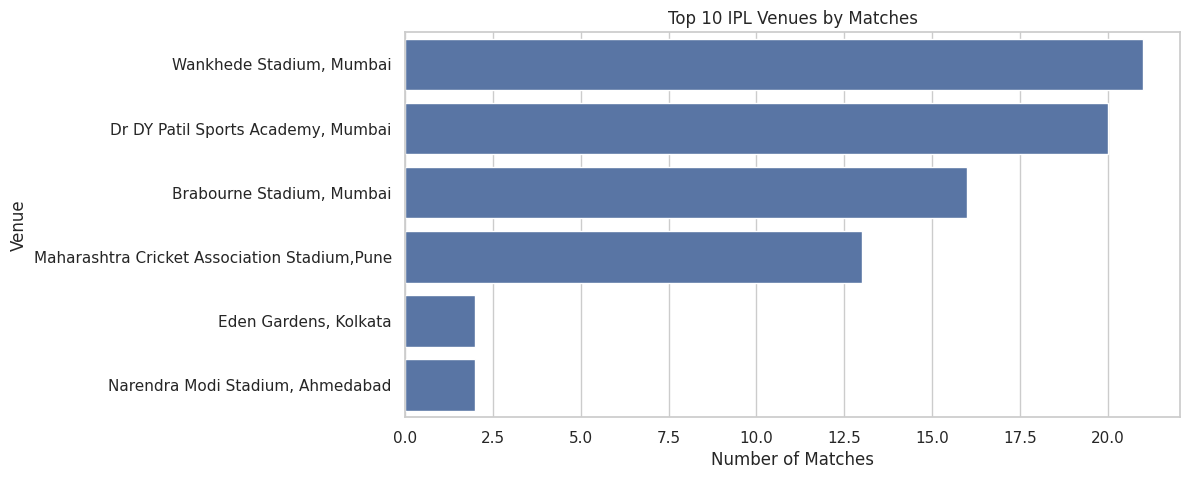

In [22]:
top_venues = df["venue"].value_counts().head(10)

sns.barplot(
    x=top_venues.values,
    y=top_venues.index
)
plt.title("Top 10 IPL Venues by Matches")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()


**Insight:**  Wankhede Stadium and other Mumbai venues dominate match hosting, indicating a central role in the tournament.

### Final Conclusions

1) Toss Strategy Matters

Teams that choose to field after winning the toss have a higher win rate, showing the advantage of chasing in IPL matches.
This suggests teams make strategic decisions based on pitch behavior and dew conditions.

2)  Gujarat’s Consistent Dominance

Gujarat emerges as the most successful team with the highest number of wins, indicating strong team balance and execution.
Their consistent performance sets them apart from other teams in the tournament.

3) Competitive Scoring Range

Most matches are competitive when the first-innings score lies between 140 and 180 runs.
Scores above this range significantly increase the chances of defending successfully.

4)  Individual Performances Drive Results

Players like Kuldeep Yadav and Jos Buttler frequently win Player of the Match awards, highlighting the impact of individual brilliance.
Such performances often play a decisive role in match outcomes.

5) Venue Influence on Matches

A large number of matches are hosted at Mumbai-based venues, which may influence team strategies and familiarity.
Venue conditions play an important role in toss decisions and match results.